# Convergence analysis for Newmark standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.colors as colors

sns.set_theme(style="whitegrid")

In [ ]:
csv_path = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv')
df_newmark = pd.read_csv(csv_path)
# Drop duplicates keeping the last entry
df_newmark = df_newmark.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method', 'beta', 'gamma'], keep='last')
df_newmark.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/newmark-standing-mode-wsol/convergence.csv'

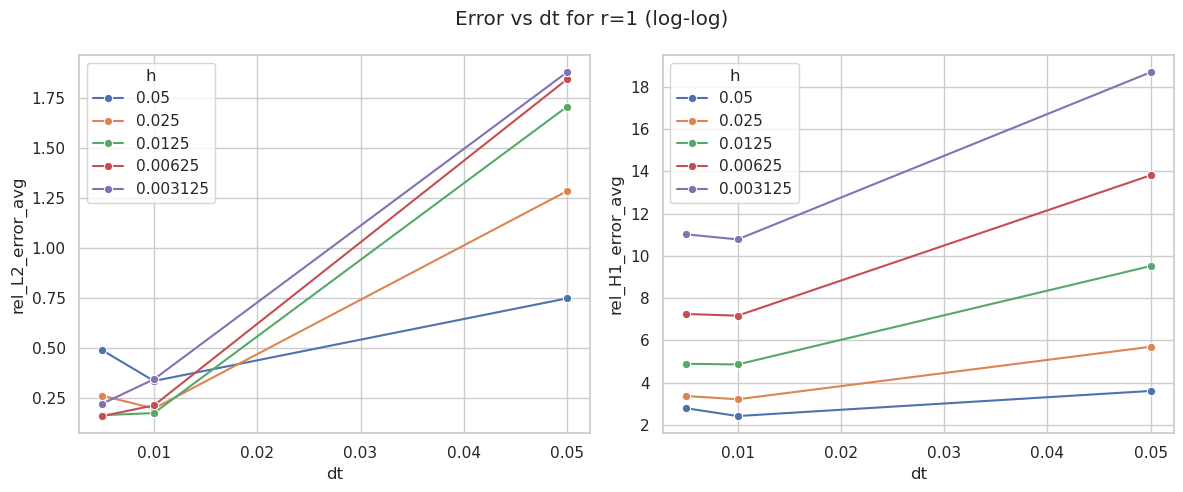

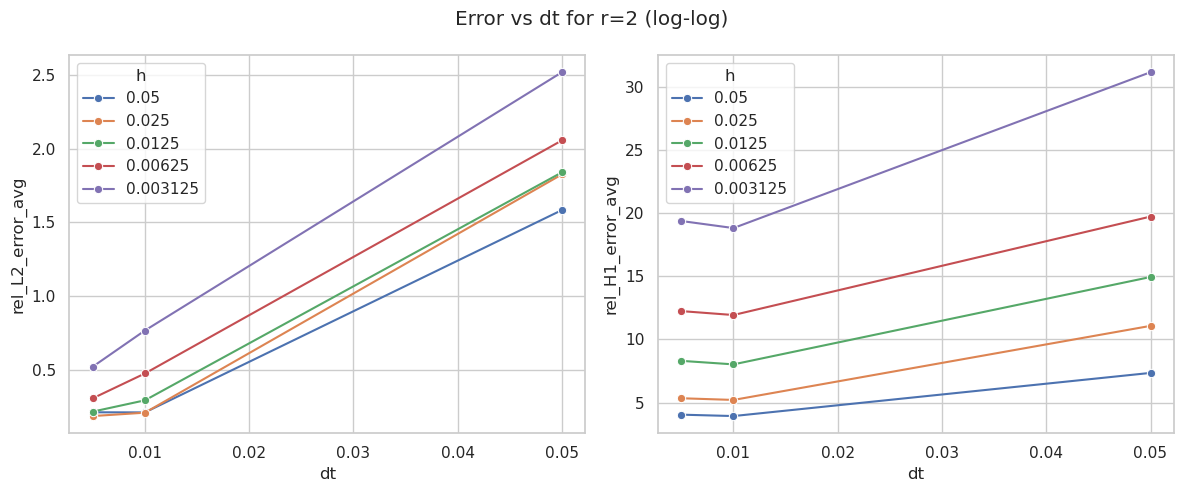

In [ ]:
# Errors vs dt separated by r using seaborn
figs = []
for r_val in sorted(df_newmark['r'].unique()):
    sub = df_newmark[df_newmark['r'] == r_val].copy()
    sub['h_label'] = sub['h'].astype(str)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
    sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
    sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
    for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
        ax.set_xscale('log'); ax.set_yscale('log')
        ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
    axes[0].legend(title='h'); axes[1].legend(title='h')
    fig.suptitle(f'Error vs dt for r={r_val} (log-log)')
    plt.tight_layout()
    figs.append(fig)

In [ ]:
# Determine common limits for color scaling across both methods
l2_min = min(df_newmark['rel_L2_error_avg'].min(), df_newmark['rel_L2_error_avg'].min())
l2_max = max(df_newmark['rel_L2_error_avg'].max(), df_newmark['rel_L2_error_avg'].max())
h1_min = min(df_newmark['rel_H1_error_avg'].min(), df_newmark['rel_H1_error_avg'].min())
h1_max = max(df_newmark['rel_H1_error_avg'].max(), df_newmark['rel_H1_error_avg'].max())

for r_val in sorted(df_newmark['r'].unique()):
    sub = df_newmark[df_newmark['r'] == r_val].copy()
    pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
    pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
    sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
    sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
    axes[0].set_title(f'L2 error (r={r_val})'); axes[1].set_title(f'H1 error (r={r_val})')
    axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
    plt.tight_layout()

# Convergence analysis for Theta standing mode (wsol)
Load `convergence.csv`, inspect the data, and visualize L2/H1 errors vs time step and mesh size.

In [6]:
csv_path_theta = Path('/home/ghi/Documents/HPC-PoliMi/NMPDE/labs/wave-equation/results/theta-standing-mode-wsol/convergence.csv')
df_theta = pd.read_csv(csv_path_theta)
# Drop duplicates keeping the last entry
df_theta = df_theta.drop_duplicates(subset=['h', 'N_el_x', 'N_el_y', 'r', 'dt', 'T', 'method', 'theta'], keep='last')
df_theta.head()

,h,N_el_x,N_el_y,r,dt,T,method,theta,beta,gamma,rel_L2_error_avg,rel_H1_error_avg,elapsed_time_s
0,0.05,20,20,1,0.100,1,theta-standing-mode-wsol,0.5,NaN,NaN,0.203039,0.223043,0.048
1,0.05,20,20,1,0.050,1,theta-standing-mode-wsol,0.5,NaN,NaN,0.010334,0.077692,0.076
2,0.05,20,20,1,0.010,1,theta-standing-mode-wsol,0.5,NaN,NaN,0.014965,0.078635,0.358
3,0.05,20,20,1,0.005,1,theta-standing-mode-wsol,0.5,NaN,NaN,0.027722,0.090682,0.715
4,0.05,20,20,1,0.001,1,theta-standing-mode-wsol,0.5,NaN,NaN,0.018297,0.082357,3.575


In [7]:
# Create BE (theta=1.0) and CN (theta=0.5) subsets
df_be = df_theta[df_theta['theta'] == 1.0].copy()
df_cn = df_theta[df_theta['theta'] == 0.5].copy()
print('BE rows:', len(df_be), 'CN rows:', len(df_cn))

BE rows: 50 CN rows: 50


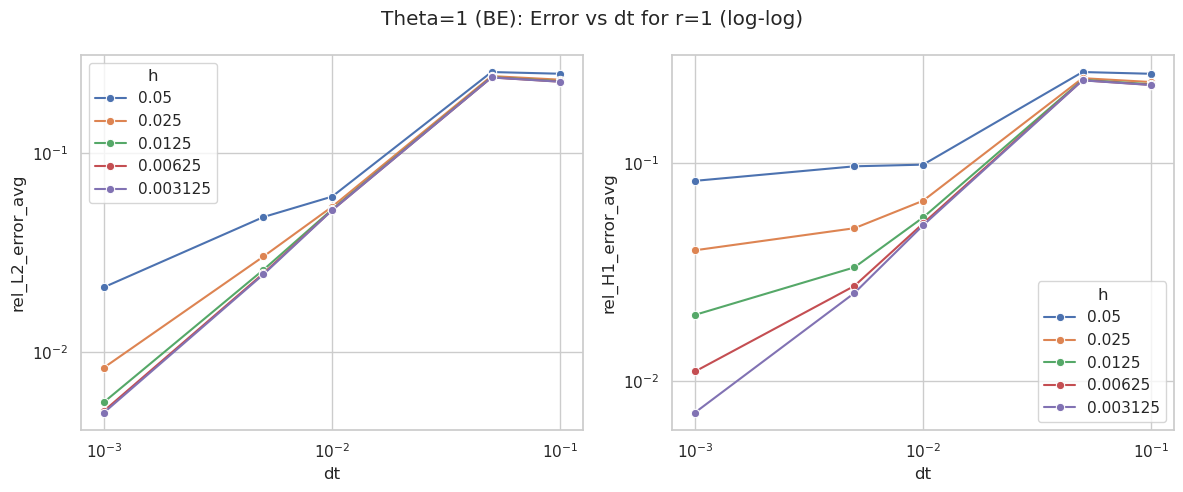

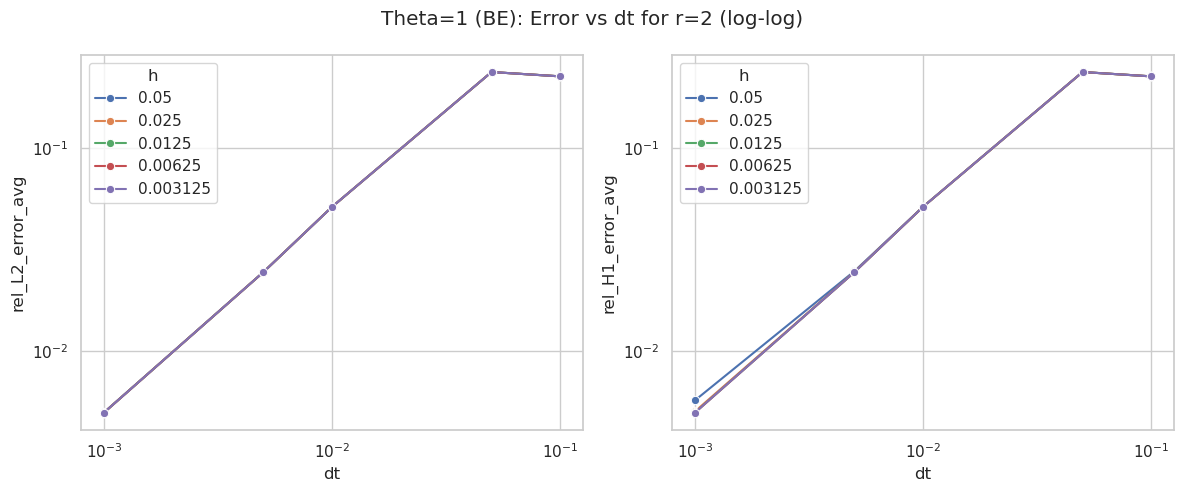

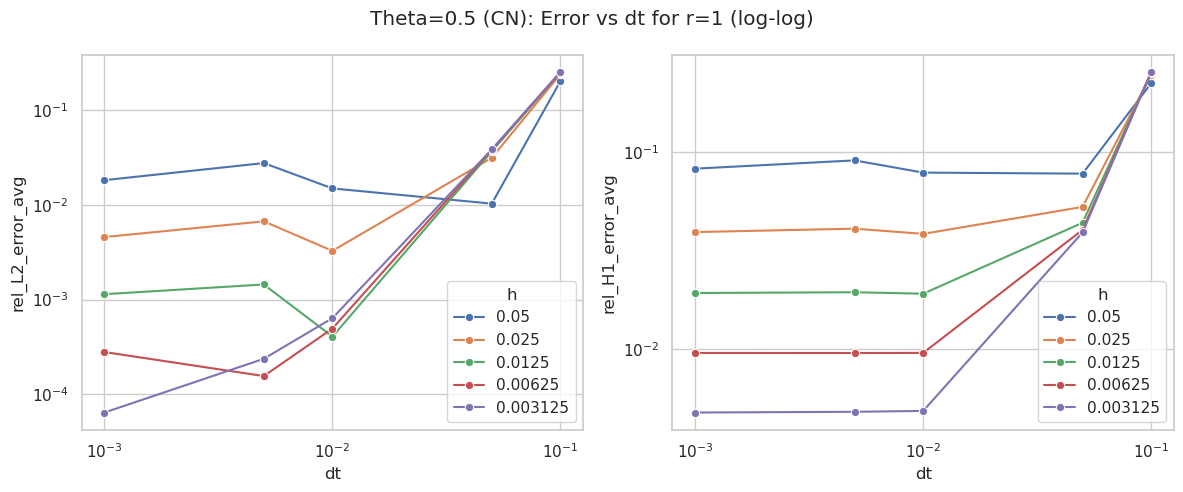

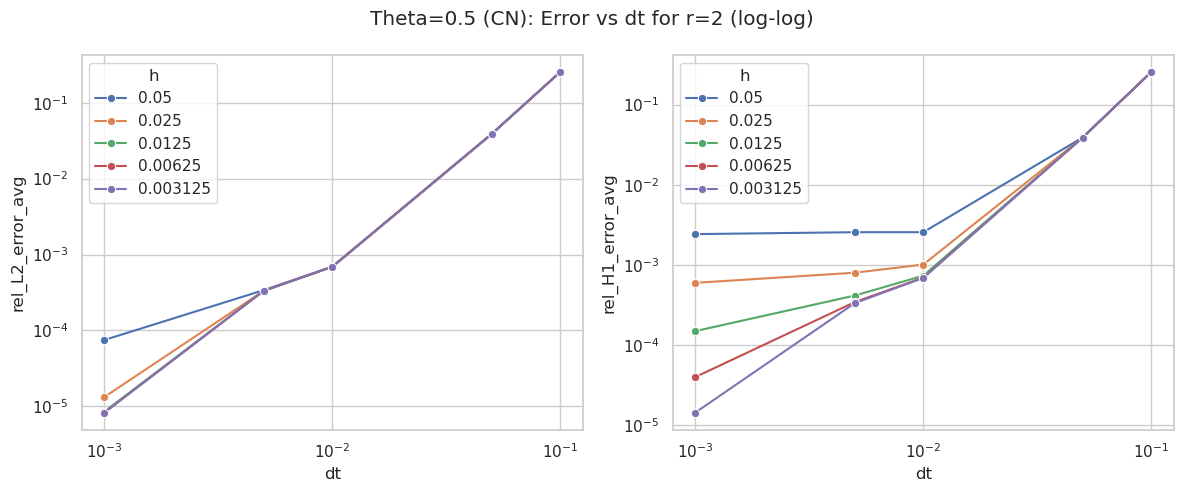

In [8]:
# Helper to plot line charts for a given subset
def plot_lines_by_r(df, scheme_name):
    figs_local = []
    for r_val in sorted(df['r'].unique()):
        sub = df[df['r'] == r_val].copy()
        if sub.empty:
            continue
        sub['h_label'] = sub['h'].astype(str)
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
        sns.lineplot(data=sub, x='dt', y='rel_L2_error_avg', hue='h_label', marker='o', ax=axes[0])
        sns.lineplot(data=sub, x='dt', y='rel_H1_error_avg', hue='h_label', marker='o', ax=axes[1])
        for ax, ylabel in zip(axes, ['rel_L2_error_avg', 'rel_H1_error_avg']):
            ax.set_xscale('log'); ax.set_yscale('log')
            ax.set_xlabel('dt'); ax.set_ylabel(ylabel)
        axes[0].legend(title='h'); axes[1].legend(title='h')
        fig.suptitle(f'{scheme_name}: Error vs dt for r={r_val} (log-log)')
        plt.tight_layout()
        figs_local.append(fig)
    return figs_local

figs_be = plot_lines_by_r(df_be, 'Theta=1 (BE)')
figs_cn = plot_lines_by_r(df_cn, 'Theta=0.5 (CN)')

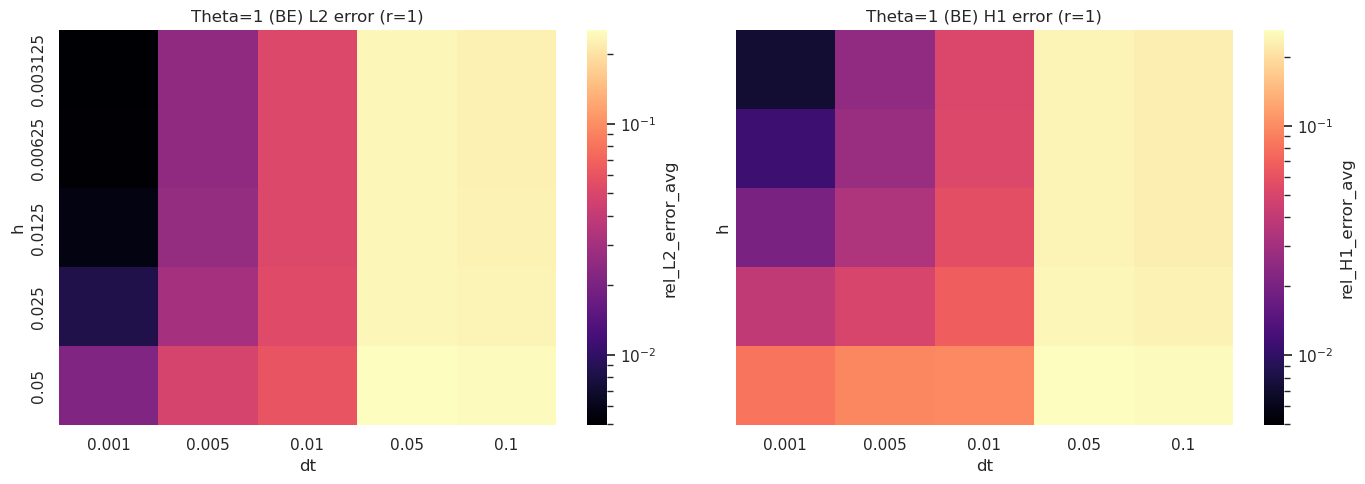

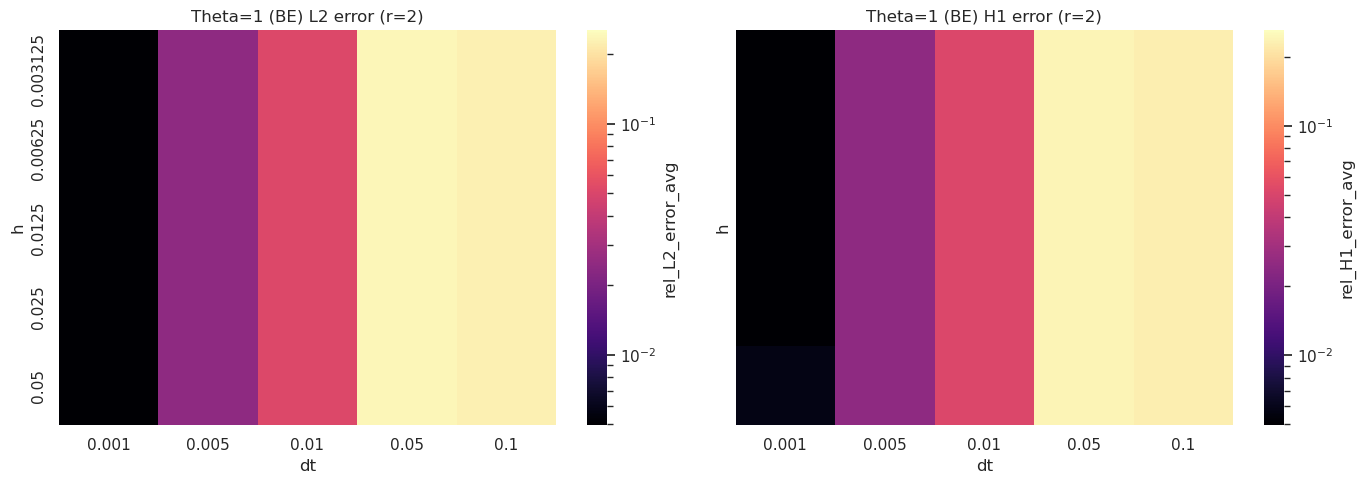

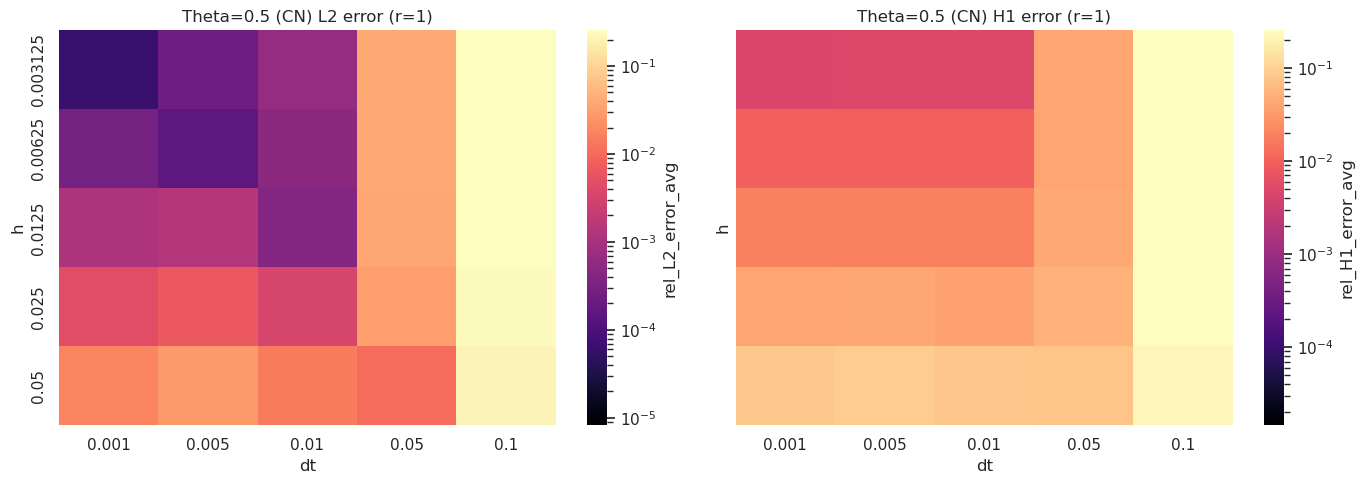

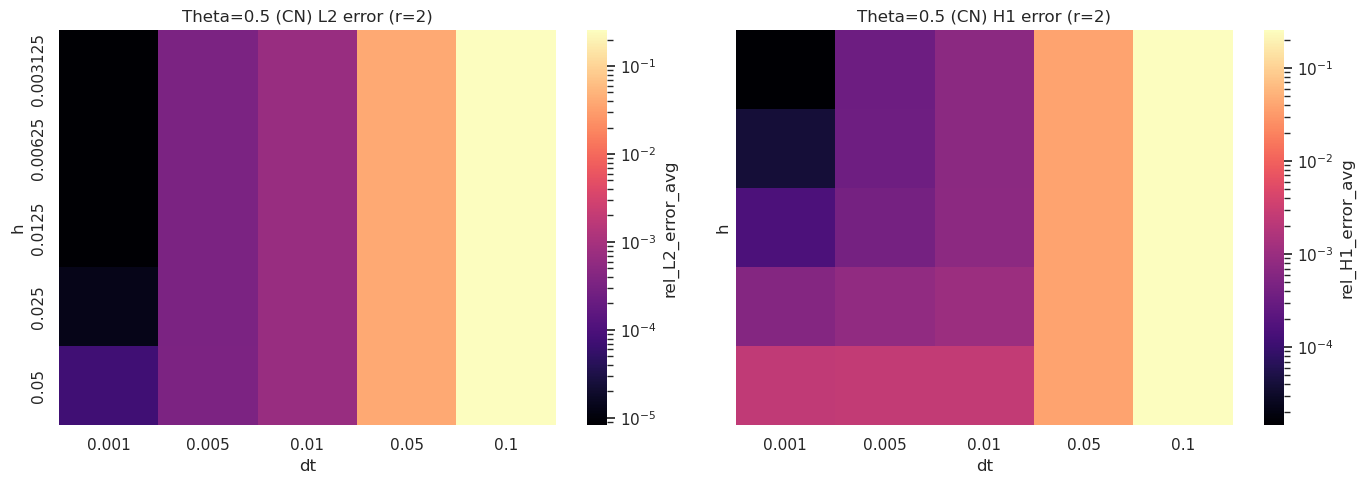

In [9]:
# Helper to plot heatmaps for a given subset with local min/max
def plot_heatmaps(df, scheme_name):
    if df.empty:
        return
    l2_min = df['rel_L2_error_avg'].min(); l2_max = df['rel_L2_error_avg'].max()
    h1_min = df['rel_H1_error_avg'].min(); h1_max = df['rel_H1_error_avg'].max()
    for r_val in sorted(df['r'].unique()):
        sub = df[df['r'] == r_val].copy()
        if sub.empty:
            continue
        pivot_l2 = sub.pivot_table(index='h', columns='dt', values='rel_L2_error_avg')
        pivot_h1 = sub.pivot_table(index='h', columns='dt', values='rel_H1_error_avg')
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False, sharey=True)
        sns.heatmap(pivot_l2, ax=axes[0], cmap='magma', norm=colors.LogNorm(vmin=l2_min, vmax=l2_max), cbar_kws={'label': 'rel_L2_error_avg'})
        sns.heatmap(pivot_h1, ax=axes[1], cmap='magma', norm=colors.LogNorm(vmin=h1_min, vmax=h1_max), cbar_kws={'label': 'rel_H1_error_avg'})
        axes[0].set_title(f'{scheme_name} L2 error (r={r_val})'); axes[1].set_title(f'{scheme_name} H1 error (r={r_val})')
        axes[0].set_xlabel('dt'); axes[1].set_xlabel('dt'); axes[0].set_ylabel('h')
        plt.tight_layout()

plot_heatmaps(df_be, 'Theta=1 (BE)')
plot_heatmaps(df_cn, 'Theta=0.5 (CN)')